In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
from intern.remote.boss import BossRemote
import numpy as np
import time
import pandas as pd

In [3]:
boss = BossRemote({
    "protocol": "http",
    "host": "localhost:5000",
    "token": "None"
})

In [4]:
def generate_random_data(shape):
    my_data = np.random.randint(0, 100, shape, dtype="uint8")
    for i in range(my_data.shape[0]):
        my_data[i] += int(i/4)
    for j in range(my_data.shape[2]):
        my_data[:,:,j] += int(j/4)
    return my_data

def run_upload(data):
    boss.create_cutout(
        boss.get_channel("my_channel", "my_collection", "my_experiment"),
        0, 
        [0, data.shape[0]], 
        [0, data.shape[1]], 
        [0, data.shape[2]], 
        data
    )

def run_download(shape):
    new_data = boss.get_cutout(
        boss.get_channel("my_channel", "my_collection", "my_experiment"),
        0, 
        [0, shape[0]], 
        [0, shape[1]], 
        [0, shape[2]]
    )

In [5]:
sizes_to_test = [
    20,
    50,
    75,
    100,
    200,
    250,
    300,
    250,
    400,
    500,
    800,
]

In [9]:
upload_times = []
download_times = []
for size in sizes_to_test:
    for i in range(3):
        shape = (size, size, size)
        data = generate_random_data(shape)
        tic = time.time()
        run_upload(data)
        upload_times.append({
            "size": size,
            "time": time.time() - tic,
            "attempt": i
        })
        tic = time.time()
        run_download(shape)
        download_times.append({
            "size": size,
            "time": time.time() - tic,
            "attempt": i
        })
upload_df = pd.DataFrame(upload_times)
download_df = pd.DataFrame(download_times)

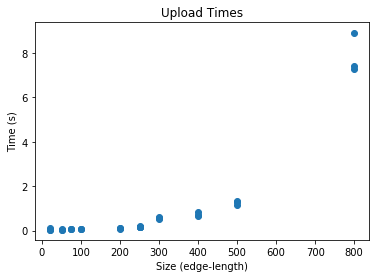

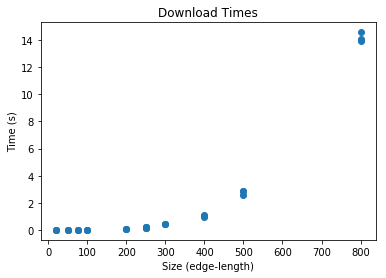

In [10]:
plt.title("Upload Times")
plt.scatter(upload_df['size'], upload_df.time)
plt.ylabel("Time (s)")
plt.xlabel("Size (edge-length)")
plt.show()


plt.title("Download Times")
plt.scatter(download_df['size'], download_df.time)
plt.ylabel("Time (s)")
plt.xlabel("Size (edge-length)")
plt.show()